In [1]:
from Naive_bayes import NaiveBayes
import pandas as pd
import numpy as np
from scipy.spatial.distance import pdist, squareform
from scipy.spatial import distance 
import math
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tqdm import tqdm
from time import sleep
from tqdm import trange
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import math as mt
import time
from numpy.linalg import inv, det
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
%matplotlib inline

In [2]:
mfeat = pd.read_csv("mfeat/mfeat-fac", delimiter="\0", sep="\0", header=None )
mfeatFou = pd.read_csv("mfeat/mfeat-fou", delimiter="\0", sep="\0", header=None )
mfeatka = pd.read_csv("mfeat/mfeat-kar", delimiter="\0", sep="\0", header=None )

y = [0 for x in range(0, 200)]
y += [1 for x in range(200, 400)]
y += [2 for x in range(400, 600)]
y += [3 for x in range(600, 800)]
y += [4 for x in range(800, 1000)]
y += [5 for x in range(1000, 1200)]
y += [6 for x in range(1200, 1400)]
y += [7 for x in range(1400, 1600)]
y += [8 for x in range(1600, 1800)]
y += [9 for x in range(1800, 2000)]

y = np.array(y)

In [3]:
#Retirando os espaços. Transformando da elemento em uma lista com valores númericos, Atribuindo isso a uma 
# lista com tudo processado e normaliza
def preprocessing(data):
    new_data = []
    for ex in data:
        ex = ex[0].split(" ")
        exemplos1 = []
        for element in ex:
            if element != "":
                exemplos1.append(element)
        new_data.append(exemplos1) 
    
    ## Normaliza
  
    new_data = np.array(new_data).astype(float)
    scaler = StandardScaler()
    scaler.fit(new_data)
    new_data = scaler.transform(new_data)
    return new_data
   

In [4]:
mfeat =  preprocessing(mfeat.values)
mfeatFou =  preprocessing(mfeatFou.values)
mfeatKa =  preprocessing(mfeatka.values)

In [14]:
kf = KFold(n_splits=10,shuffle=True)

In [50]:

list_acc = []
count = 0


for i in trange(0, 30):
    acc_fold = []
    for train_index, test_index in kf.split(np.array((mfeat))):
       
        X_trains = []
        y_train_views = []
        X_tests = []
    
        X_train_view1, X_test_view1 = mfeat[train_index], mfeat[test_index]
        y_train_view1, y_test_view1 = y[train_index], y[test_index]
      
       
       
        X_train_view2, X_test_view2 = mfeatFou[train_index], mfeatFou[test_index]
        y_train_view2, y_test_view2 = y[train_index], y[test_index]
       
   

        X_train_view3, X_test_view3 = mfeatKa[train_index], mfeatKa[test_index]
        y_train_view3, y_test_view3 = y[train_index], y[test_index]
        
  
        
        ##Values   
        X_trains = [X_train_view1, X_train_view2, X_train_view3]
        y_train_views = [y_train_view1, y_train_view2, y_train_view3]
        X_tests = [X_test_view1, X_test_view2, X_test_view3]
        nb = NaiveBayes()
        
        nb.fit(X_trains, y_train_views)
        
        y_pred = nb.predict(X_tests=X_tests);
        
        acc_fold = accuracy_score(y_test_view1, y_pred)
        
    list_acc.append(np.mean(acc_fold))


100%|██████████| 30/30 [28:36<00:00, 56.72s/it]


In [56]:
 np.mean(list_acc)

0.9360333333333332

## Construíndo um intervalo de confiaça para o y do próprio dataset

In [ ]:

confidence = 0.95
data = list_acc

n = len(list_acc)
m = mean(list_acc)
std_err = sem(list_acc)
h = std_err * t.ppf((1 + confidence) / 2, n - 1)

start = m - h
print (start)

## Teste do KNN

In [6]:

X_train_mfeat, X_test_mfeat, y_train_mfeat, y_test_mefeat =  train_test_split(mfeat,y, test_size=0.10, random_state=42)
X_train_mfeatFou, X_test_mfeatFou, y_train_mfeatFou, y_test_mefeatFou =  train_test_split(mfeatFou,y, test_size=0.10, random_state=42)
X_train_mfeatKa, X_test_mfeatKa, y_train_mfeatKa, y_test_mefeatKa =  train_test_split(mfeatKa,y, test_size=0.10, random_state=42)

In [7]:
import knn

In [8]:
k = knn.KNN()

In [9]:
trains = [X_train_mfeat, X_train_mfeatFou, X_train_mfeatKa]
y_trains = [y_train_mfeat,y_train_mfeatFou, y_train_mfeatKa]
tests = [X_test_mfeat, X_test_mfeatFou, X_test_mfeatKa]

In [10]:
k.fit(X_trains=trains, y_trains=y_trains, k=3)

In [ ]:
y = k.predict(X_tests=tests)

In [13]:
accuracy_score(y_test_mefeatFou, y)

0.965

In [8]:
kf = KFold(n_splits=10,shuffle=True)

In [10]:
list_acc = []
count = 0


for i in trange(0, 30):
    acc_fold = []
    for train_index, test_index in kf.split(np.array((mfeat))):
       
        X_trains = []
        y_train_views = []
        X_tests = []
    
        X_train_view1, X_test_view1 = mfeat[train_index], mfeat[test_index]
        y_train_view1, y_test_view1 = y[train_index], y[test_index]
      
       
       
        X_train_view2, X_test_view2 = mfeatFou[train_index], mfeatFou[test_index]
        y_train_view2, y_test_view2 = y[train_index], y[test_index]
       
   

        X_train_view3, X_test_view3 = mfeatKa[train_index], mfeatKa[test_index]
        y_train_view3, y_test_view3 = y[train_index], y[test_index]
        
  
        
        ##Values   
        X_trains = [X_train_view1, X_train_view2, X_train_view3]
        y_trains = [y_train_view1, y_train_view2, y_train_view3]
        X_tests = [X_test_view1, X_test_view2, X_test_view3]
        k = knn.KNN()
        
        k.fit(X_trains=X_trains, y_trains=y_trains, k=3)
        
        y_pred = k.predict(X_tests=X_tests);
        
        acc_fold = accuracy_score(y_test_view1, y_pred)
        
    list_acc.append(np.mean(acc_fold))

100%|██████████| 30/30 [1:53:58<00:00, 216.98s/it]


## Histograma com as acurácias do KNN usando Kfold

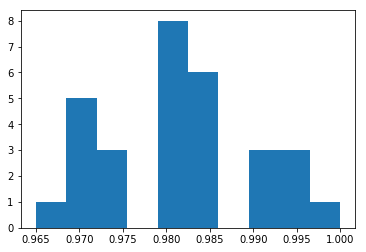

In [27]:
plt.hist(list_acc, bins=10);

In [23]:
np.mean(list_acc)

0.9814999999999999